In [50]:
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import time

In [51]:
lfw=datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)   #we don't want politicians with less than 100 images
#also, we are resizing the images to 40% of original size

In [52]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [53]:
lfw.data.shape

(1140, 1850)

In [54]:
lfw.images.shape              #images are rectangular

(1140, 50, 37)

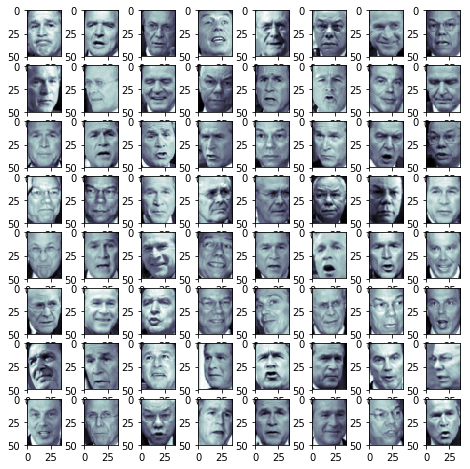

In [55]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i],cmap=plt.cm.bone)        #plt.sm.bone will just whiten the images instead of the default greenish
plt.show()

In [56]:
x=lfw.data
y=lfw.target
x_train,x_test,y_train,y_test=tts(x,y,random_state=0)

In [62]:
pca=PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [63]:
k=0
cur_variance=0
total_variance=pca.explained_variance_.sum()
while cur_variance/total_variance<0.99:
    cur_variance+=pca.explained_variance_[k]
    k+=1
k

316

In [64]:
pca=PCA(n_components=k)
x_train_new=pca.fit_transform(x_train)
x_test_new=pca.transform(x_test)

In [65]:
x_approx=pca.inverse_transform(x_train_new)
x_approx=x_approx.reshape(855,50,37)

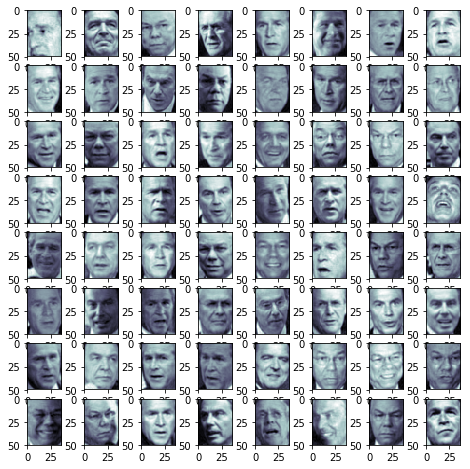

In [66]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx[i],cmap=plt.cm.bone)        
plt.show()

In [67]:
eigenv=pca.components_
eigenv.shape

(316, 1850)

In [68]:
eigen_faces=eigenv.reshape(316,50,37)

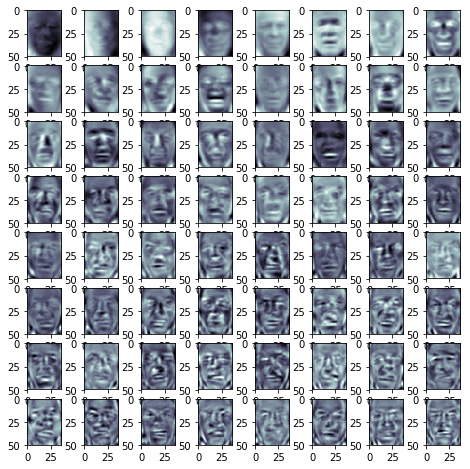

In [69]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigen_faces[i],cmap=plt.cm.bone)        
plt.show()

In [70]:
clf=RandomForestClassifier()                        #logistic Regression would take more time than this, but will give
start=time.time()                                   #better score(in this case)
clf.fit(x_train,y_train)
end=time.time()
print(end-start)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

C:\Users\akshay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.198164701461792
              precision    recall  f1-score   support

           0       0.66      0.80      0.73        61
           1       0.50      0.28      0.36        36
           2       0.65      0.88      0.75       122
           3       0.40      0.13      0.20        31
           4       0.69      0.31      0.43        35

   micro avg       0.64      0.64      0.64       285
   macro avg       0.58      0.48      0.49       285
weighted avg       0.61      0.64      0.59       285

[[ 49   2   8   0   2]
 [  9  10  15   1   1]
 [  8   5 107   2   0]
 [  3   3  19   4   2]
 [  5   0  16   3  11]]


In [72]:
clf=RandomForestClassifier()                        #logistic Regression would take more time than this, bbut will give
start=time.time()                                   #better score(in this case)
clf.fit(x_train_new,y_train)
end=time.time()
print(end-start)
y_pred=clf.predict(x_test_new)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.1190180778503418
              precision    recall  f1-score   support

           0       0.37      0.39      0.38        61
           1       0.58      0.19      0.29        36
           2       0.52      0.81      0.63       122
           3       0.25      0.03      0.06        31
           4       0.17      0.06      0.09        35

   micro avg       0.47      0.47      0.47       285
   macro avg       0.38      0.30      0.29       285
weighted avg       0.42      0.47      0.40       285

[[24  2 34  0  1]
 [ 6  7 19  1  3]
 [16  1 99  2  4]
 [11  1 16  1  2]
 [ 8  1 24  0  2]]


C:\Users\akshay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
